In [13]:
%pip install -U pip
%pip install ikpy numpy scipy matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import ikpy.chain as ikc
import numpy as np
import ikpy.utils.plot as plt
from scipy.spatial.transform import Rotation as R

In [29]:
leg_chain = ikc.Chain.from_urdf_file("crab_legs.urdf",active_links_mask=[False,True,True,True,True,False,False])

In [44]:
target_position = [0.000, 0.295, -0.104]

ik = leg_chain.inverse_kinematics(target_position=target_position)
print("ik:" , ik)

T_ee = leg_chain.forward_kinematics(ik)
pos = T_ee[:3, 3]
rpy = R.from_matrix(T_ee[:3, :3]).as_euler('xyz')  # 末端姿态(Euler)

# print("FK position:", pos)
# print("FK rpy (rad):", rpy)
# print("T_ee:\n", T_ee)
# # 可选：拿到整条链每一节的位姿
all_T = leg_chain.forward_kinematics(ik, full_kinematics=True)
print("All link transforms:")
for i, T in enumerate(all_T):
    print(f"Link {i}:\n{T}\n")       


ik: [ 0.          0.10632532  0.32417409 -0.27232294  0.1496383   0.
  0.        ]
All link transforms:
Link 0:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Link 1:
[[ 0.99435279 -0.1061251   0.          0.        ]
 [ 0.1061251   0.99435279  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

Link 2:
[[ 0.99435279 -0.07575665 -0.07432003 -0.00159188]
 [ 0.1061251   0.70981167  0.69635111  0.01491529]
 [ 0.         -0.70030588  0.71384289  0.        ]
 [ 0.          0.          0.          1.        ]]

Link 3:
[[ 0.99435279  0.09191525 -0.05304831 -0.01757068]
 [ 0.1061251  -0.86121181  0.49704294  0.16463078]
 [ 0.         -0.49986579 -0.86610288  0.15347622]
 [ 0.          0.          0.          1.        ]]

Link 4:
[[ 0.98992888  0.096177    0.10387879 -0.02181455]
 [ 0.04227584 -0.90114281  0.43145612  0.20439421]
 [ 0.13510578 -0.42271931 -0.89613326  0.08418799]
 [ 0.          0.      

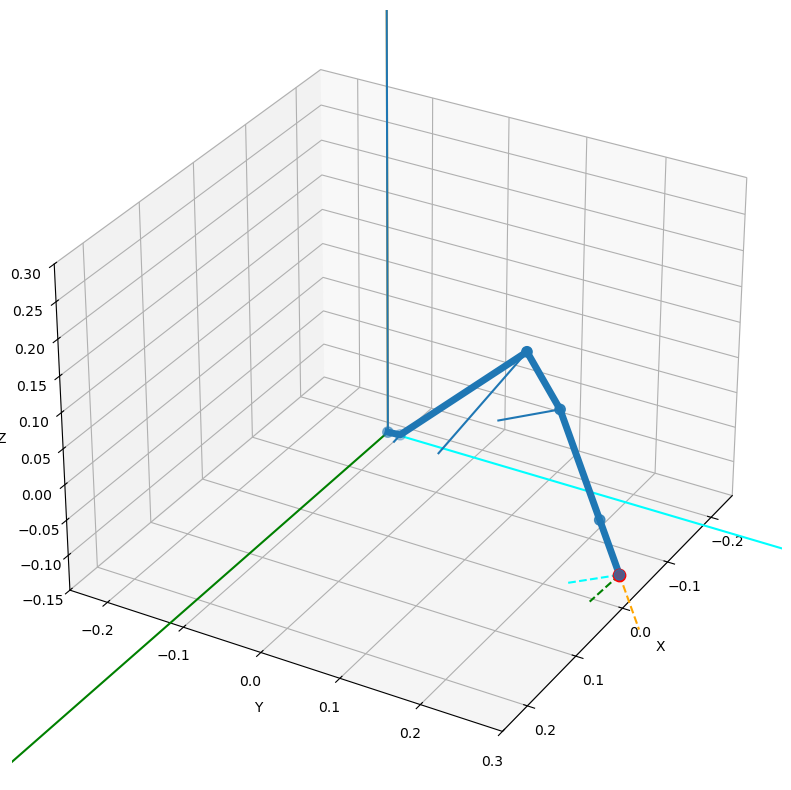

In [45]:
import matplotlib.pyplot as pt

fig,ax = plt.init_3d_figure()
fig.set_figheight(10)
fig.set_figwidth(10)

ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.3)
ax.set_zlim( -0.15, 0.30)

ax.view_init(azim=30, elev=30)

leg_chain.plot(ik,ax, target=target_position)
pt.ion()
